In [1]:
# !pip3 install ipympl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from math import sqrt, sin, cos
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import f_oneway, pearsonr
# %matplotlib widget

/home/sweksha/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
from pathlib import Path
import os
import csv, glob
import matplotlib.patches as patches

def read_last_row(csv_file):
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        last_row = None
        for row in reader:
            last_row = row
        return last_row
 
directory = '/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs'
data = [glob.glob(f'{directory}/Data{i}/*1.csv') for i in range(39)]
print(data)
new_csv = [pd.read_csv(path[0]) for path in data]
new_csv[-1].iloc[-1]
last_entry = [i.iloc[-1] for i in new_csv]
# print(last_entry[1])
last_csv = pd.DataFrame(last_entry)
# print(last_csv)
last_csv.to_csv('/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry1.csv')

[['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data0/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data1/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data2/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data3/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data4/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data5/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data6/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data7/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data8/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data9/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data10/tb3_1.csv'], ['/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/Data11/tb

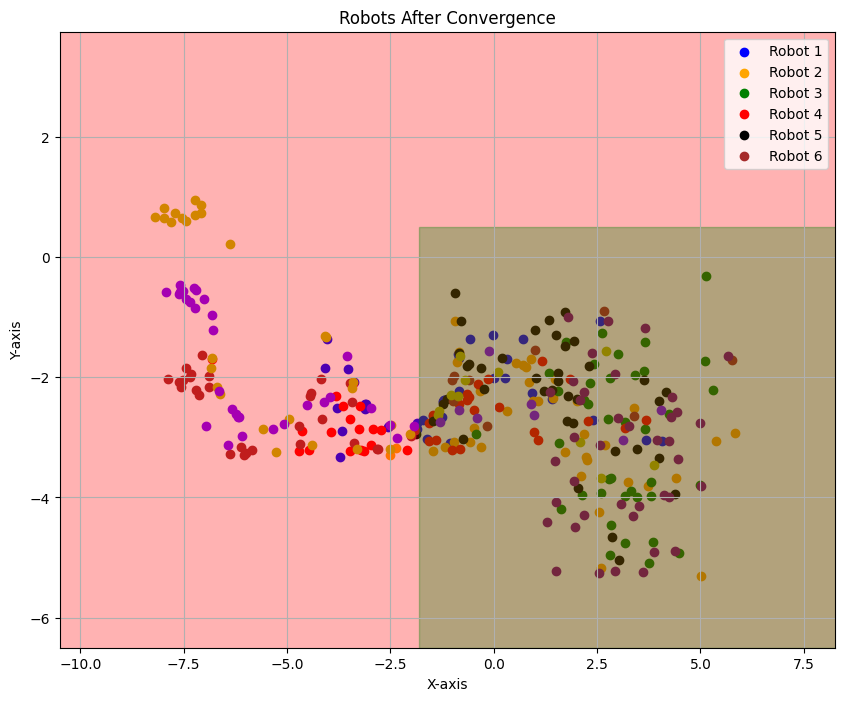

In [12]:
# Plotting the scatter plot
csv_files = [ '/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry1.csv',
'/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry2.csv',
'/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry3.csv',
'/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry4.csv',
'/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry5.csv',
'/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry6.csv',
'/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry7.csv',
'/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry8.csv',
'/home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry9.csv'] 
# data = pd.read_csv(csv_files)

plt.figure(figsize=(10, 8))
# Define colors for each scatter plot
colors = ['blue', 'orange', 'green', 'red', 'black', 'brown', 'y', '#7F00FF', '#800080']

for csv_file, color in zip(csv_files, colors):
    data = pd.read_csv(csv_file)
    plt.scatter(data[' x'], data[' y '], color=color, label=csv_file.split('.')[0])

# Set axis boundaries
plt.xlim(-10.5, 8.25)
plt.ylim(-6.5, 3.75)

# Add red rectangles to cover the rest of the plot area
background = patches.Rectangle((-10.5, -6.5), 18.75, 10.25, linewidth=0, edgecolor='none', facecolor='red', alpha=0.3)
plt.gca().add_patch(background)

# Add a green rectangle
green_rectangle = patches.Rectangle((-1.8, -6.5), 13.05, 7.0, linewidth=1, edgecolor='green', facecolor='green', alpha=0.3)
plt.gca().add_patch(green_rectangle)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Robots After Convergence')
plt.legend(['Robot 1','Robot 2','Robot 3','Robot 4','Robot 5','Robot 6'])

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [13]:
# Calculating the success percentage 
def calculate_percentage_in_rectangle(csv_file, x_min, x_max, y_min, y_max):
    data = pd.read_csv(csv_file)
    total_points = len(data)
    points_in_rectangle = data[(data[' x'] >= x_min) & (data[' x'] <= x_max) & 
                               (data[' y '] >= y_min) & (data[' y '] <= y_max)]
    points_in_rectangle_count = len(points_in_rectangle)
    percentage_in_rectangle = (points_in_rectangle_count / total_points) * 100
    return percentage_in_rectangle

# Define the boundaries of the green rectangle
x_min, x_max = -1.8, 8.1
y_min, y_max = -6.5, 0.5

for csv_file in csv_files:
    percentage = calculate_percentage_in_rectangle(csv_file, x_min, x_max, y_min, y_max)
    print(f"Percentage of points in the rectangle for {csv_file}: {percentage:.2f}%")

Percentage of points in the rectangle for /home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry1.csv: 61.54%
Percentage of points in the rectangle for /home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry2.csv: 94.87%
Percentage of points in the rectangle for /home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry3.csv: 100.00%
Percentage of points in the rectangle for /home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry4.csv: 53.85%
Percentage of points in the rectangle for /home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry5.csv: 97.44%
Percentage of points in the rectangle for /home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry6.csv: 23.08%
Percentage of points in the rectangle for /home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_robot_obs/last_entry7.csv: 28.21%
Percentage of points in the rectangle for /home/sweksha/ros_ws/src/swarm_aggregation/Data/nine_r

In [2]:
tb3_0 = pd.read_csv('/home/sweksha/Data/Lidar6_3_1/tb3_1.csv')
tb3_1 = pd.read_csv('/home/sweksha/Data/Lidar6_3_2/tb3_2.csv')
tb3_2 = pd.read_csv('/home/sweksha/Data/Lidar6_3_3/tb3_3.csv')
tb3_3 = pd.read_csv('/home/sweksha/Data/Lidar6_3_4/tb3_4.csv')
tb3_4 = pd.read_csv('/home/sweksha/Data/Lidar6_3_5/tb3_5.csv')
tb3_5 = pd.read_csv('/home/sweksha/Data/Lidar6_3_1/tb3_6.csv')
# tb3_6 = pd.read_csv('/home/sweksha/Data/Lidar20_3_2/tb3_11.csv')
# tb3_7 = pd.read_csv('/home/sweksha/Data/Lidar20_3_3/tb3_11.csv')
# tb3_8 = pd.read_csv('/home/sweksha/Data/Lidar20_3_4/tb3_11.csv')
# tb3_9 = pd.read_csv('/home/sweksha/Data/Lidar20_3_5/tb3_11.csv')
# tb3_10 = pd.read_csv('/home/sweksha/Data/Lidar6_3_1/tb3_2.csv')
# tb3_11 = pd.read_csv('/home/sweksha/Data/Lidar12_4_3/tb3_11.csv')
# tb3_12 = pd.read_csv('/home/sweksha/Data/Lidar20_4_3/tb3_12.csv')
# tb3_13 = pd.read_csv('/home/sweksha/Data/Lidar20_4_3/tb3_13.csv')
# tb3_14 = pd.read_csv('/home/sweksha/Data/Lidar20_4_3/tb3_14.csv')
# tb3_15 = pd.read_csv('/home/sweksha/Data/Lidar20_4_3/tb3_15.csv')
# tb3_16 = pd.read_csv('/home/sweksha/Data/Lidar20_4_3/tb3_16.csv')
# tb3_17 = pd.read_csv('/home/sweksha/Data/Lidar20_4_3/tb3_17.csv')
# tb3_18 = pd.read_csv('/home/sweksha/Data/Lidar20_4_3/tb3_18.csv')
# tb3_19 = pd.read_csv('/home/sweksha/Data/Lidar20_4_3/tb3_19.csv')

In [28]:
# print(tb3_0,tb3_1)
# print(tb3_2,tb3_3)
a = pd.DataFrame(tb3_0, columns = ['x','y'])
# print(a)
b = pd.DataFrame(tb3_1, columns = ['x','y'])
# print(b)
c = b.iloc[:249]
d = pd.DataFrame(tb3_2, columns = ['x','y'])
e = d.iloc[:249]
f = pd.DataFrame(tb3_3, columns = ['x','y'])
g = f.iloc[:249]
h = pd.DataFrame(tb3_4, columns = ['x','y'])
i = h.iloc[:249]
r1 = f_oneway(a,c,e,g,i)
r1

F_onewayResult(statistic=array([145.79541784, 105.02321227]), pvalue=array([3.10672859e-102, 4.26012192e-077]))

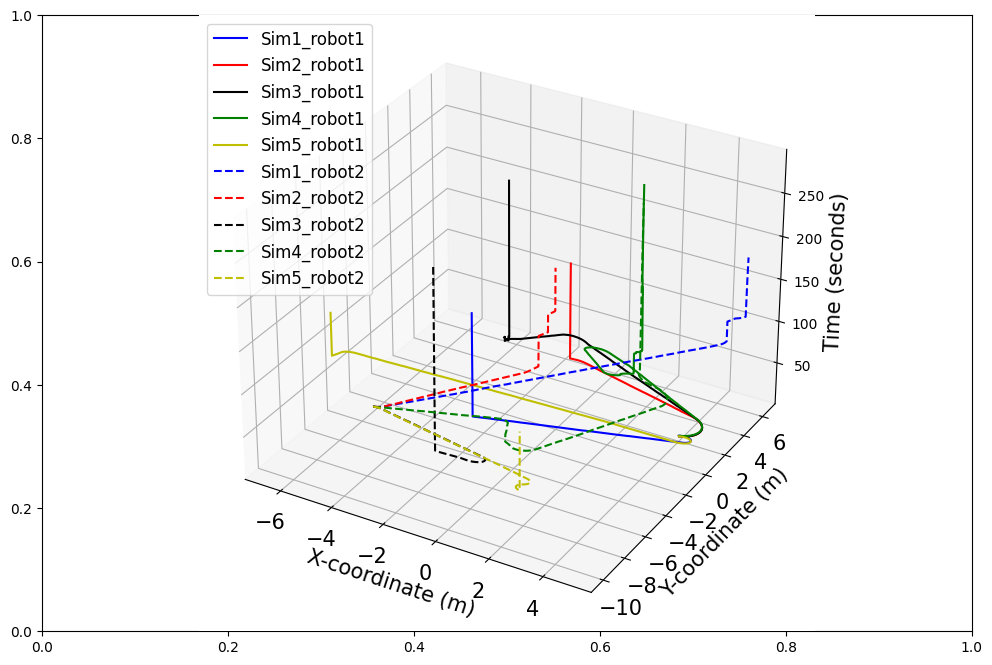

In [98]:
# ax.plot(0,0,marker = "o")
# ax.plot(-3,4,marker = "o")
fig = plt.subplots(figsize =(12, 8))
ax = plt.axes(projection = '3d')
#plt.ion()
ax.plot(tb3_0["x"].to_numpy(),tb3_0["y"].to_numpy(),tb3_0["time"].to_numpy(),  color = 'b')
ax.plot(tb3_1["x"].to_numpy(),tb3_1["y"].to_numpy(),tb3_1["time"].to_numpy(),  color = 'r')
ax.plot(tb3_2["x"].to_numpy(),tb3_2["y"].to_numpy(),tb3_2["time"].to_numpy(),  color = 'k')
ax.plot(tb3_3["x"].to_numpy(),tb3_3["y"].to_numpy(),tb3_3["time"].to_numpy(),  color = 'g')
ax.plot(tb3_4["x"].to_numpy(),tb3_4["y"].to_numpy(),tb3_4["time"].to_numpy(),  color = 'y')
ax.plot(tb3_5["x"].to_numpy(),tb3_5["y"].to_numpy(),tb3_5["time"].to_numpy(), linestyle = 'dashed', color = 'b')
# ax.plot(tb3_6["x"].to_numpy(),tb3_6["y"].to_numpy(),tb3_6["time"].to_numpy(), linestyle = 'dashed', color = 'r')
# ax.plot(tb3_7["x"].to_numpy(),tb3_7["y"].to_numpy(),tb3_7["time"].to_numpy(), linestyle = 'dashed', color = 'k')
# ax.plot(tb3_8["x"].to_numpy(),tb3_8["y"].to_numpy(),tb3_8["time"].to_numpy(), linestyle = 'dashed', color = 'g')
# ax.plot(tb3_9["x"].to_numpy(),tb3_9["y"].to_numpy(),tb3_9["time"].to_numpy(), linestyle = 'dashed', color = 'y')
# ax.plot(tb3_10["x"].to_numpy(),tb3_10["y"].to_numpy())
# ax.plot(tb3_11["x"].to_numpy(),tb3_11["y"].to_numpy())
ax.set_ylabel("Y-coordinate (m)",fontsize = "15")
ax.set_xlabel("X-coordinate (m)",fontsize = "15")
ax.set_zlabel("Time (seconds)",fontsize = "15")
ax.legend(['Robot 1','Robot 2','Robot 3','Robot 4','Robot 5','Robot 6'],loc = 'center left')
ax.legend(['Sim1_robot1','Sim2_robot1', 'Sim3_robot1', 'Sim4_robot1', 'Sim5_robot1', 'Sim1_robot2', 'Sim2_robot2', 'Sim3_robot2', 'Sim4_robot2', 'Sim5_robot2'],loc = 'upper left',fontsize = "12")
plt.xticks(fontsize = "15")
plt.yticks(fontsize = "15")
# plt.zticks(fontsize = "10")
plt.show()

TypeError: cannot convert the series to <class 'float'>

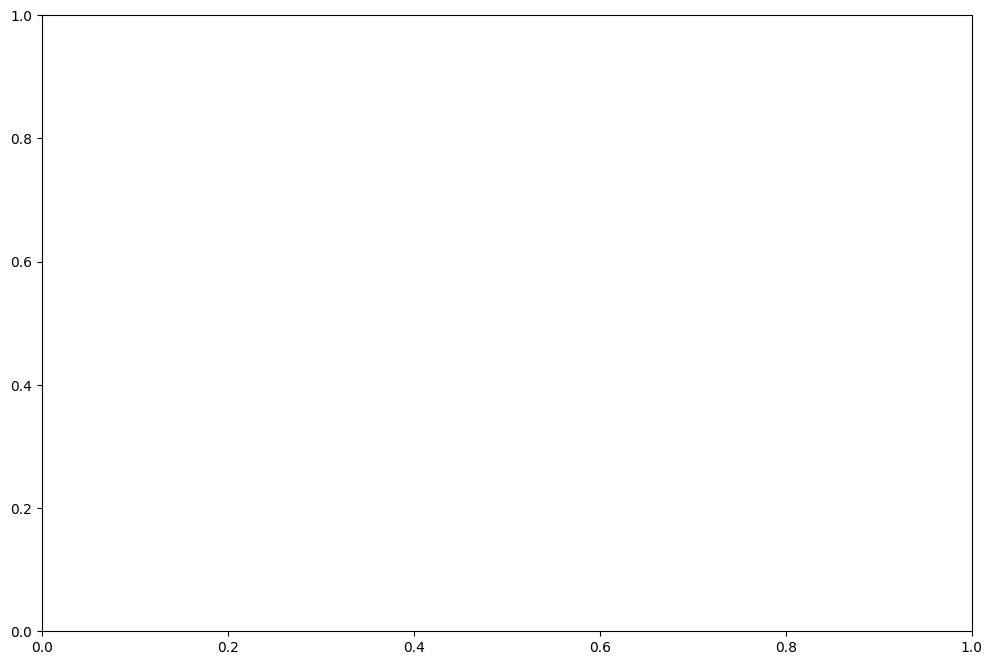

In [4]:
# ax.plot(0,0,marker = "o")
# ax.plot(-3,4,marker = "o")
fig, ax= plt.subplots(figsize =(12, 8))
# ax = plt.axes(projection = '3d')
#plt.ion()
ax.plot(sqrt((tb3_0["goal_x"]-tb3_0["x"])**2 + (tb3_0["goal_y"]-tb3_0["y"])**2),tb3_0["time"].to_numpy(),  color = 'b')
ax.plot(sqrt((tb3_1["goal_x"].to_numpy()-tb3_1["x"].to_numpy())**2 + (tb3_1["goal_y"].to_numpy()-tb3_1["y"].to_numpy())**2),tb3_1["time"].to_numpy(),  color = 'r')
ax.plot(sqrt((tb3_2["goal_x"].to_numpy()-tb3_2["x"].to_numpy())**2 + (tb3_2["goal_y"].to_numpy()-tb3_2["y"].to_numpy())**2),tb3_2["time"].to_numpy(),  color = 'k')
ax.plot(sqrt((tb3_3["goal_x"].to_numpy()-tb3_3["x"].to_numpy())**2 + (tb3_3["goal_y"].to_numpy()-tb3_3["y"].to_numpy())**2),tb3_3["time"].to_numpy(),  color = 'g')
ax.plot(sqrt((tb3_4["goal_x"].to_numpy()-tb3_4["x"].to_numpy())**2 + (tb3_4["goal_y"].to_numpy()-tb3_4["y"].to_numpy())**2),tb3_4["time"].to_numpy(),  color = 'y')
ax.plot(sqrt((tb3_5["goal_x"].to_numpy()-tb3_5["x"].to_numpy())**2 + (tb3_5["goal_y"].to_numpy()-tb3_5["y"].to_numpy())**2),tb3_5["time"].to_numpy(),  color = 'm')
# ax.plot(tb3_6["x"].to_numpy(),tb3_6["y"].to_numpy(),tb3_6["time"].to_numpy(), linestyle = 'dashed', color = 'r')
# ax.plot(tb3_7["x"].to_numpy(),tb3_7["y"].to_numpy(),tb3_7["time"].to_numpy(), linestyle = 'dashed', color = 'k')
# ax.plot(tb3_8["x"].to_numpy(),tb3_8["y"].to_numpy(),tb3_8["time"].to_numpy(), linestyle = 'dashed', color = 'g')
# ax.plot(tb3_9["x"].to_numpy(),tb3_9["y"].to_numpy(),tb3_9["time"].to_numpy(), linestyle = 'dashed', color = 'y')
# ax.plot(tb3_10["x"].to_numpy(),tb3_10["y"].to_numpy())
# ax.plot(tb3_11["x"].to_numpy(),tb3_11["y"].to_numpy())
ax.set_ylabel("Y-coordinate (m)",fontsize = "15")
ax.set_xlabel("X-coordinate (m)",fontsize = "15")
# ax.set_zlabel("Time (seconds)",fontsize = "15")
ax.legend(['Robot 1','Robot 2','Robot 3','Robot 4','Robot 5','Robot 6'],loc = 'center left')
# ax.legend(['Sim1_robot1','Sim2_robot1', 'Sim3_robot1', 'Sim4_robot1', 'Sim5_robot1', 'Sim1_robot2', 'Sim2_robot2', 'Sim3_robot2', 'Sim4_robot2', 'Sim5_robot2'],loc = 'upper left',fontsize = "12")
plt.xticks(fontsize = "15")
plt.yticks(fontsize = "15")
# plt.zticks(fontsize = "10")
plt.show()

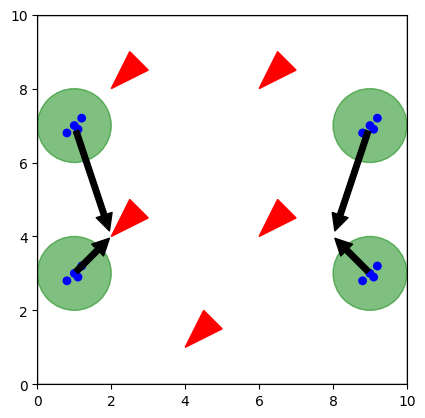

In [82]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon

# Create a figure and axis
fig, ax = plt.subplots()

# Draw the boundary
boundary = plt.Rectangle((0, 0), 10, 10, edgecolor='black', facecolor='none')
ax.add_patch(boundary)

# Draw fire zones
fire_zones = [
    Polygon([(2, 8), (3, 8.5), (2.5, 9), (2, 8)], closed=True, color='red'),
    Polygon([(6, 8), (7, 8.5), (6.5, 9), (6, 8)], closed=True, color='red'),
    Polygon([(2, 4), (3, 4.5), (2.5, 5), (2, 4)], closed=True, color='red'),
    Polygon([(6, 4), (7, 4.5), (6.5, 5), (6, 4)], closed=True, color='red'),
    Polygon([(4, 1), (5, 1.5), (4.5, 2), (4, 1)], closed=True, color='red')
]
for zone in fire_zones:
    ax.add_patch(zone)

# Draw safe zones
safe_zones = [
    Circle((1, 7), 1, color='green', alpha=0.5),
    Circle((9, 7), 1, color='green', alpha=0.5),
    Circle((1, 3), 1, color='green', alpha=0.5),
    Circle((9, 3), 1, color='green', alpha=0.5)
]
for zone in safe_zones:
    ax.add_patch(zone)

# Draw robots as clusters of small circles
robots = [
    (1, 7), (1.2, 7.2), (0.8, 6.8), (1.1, 6.9),
    (9, 7), (9.2, 7.2), (8.8, 6.8), (9.1, 6.9),
    (1, 3), (1.2, 3.2), (0.8, 2.8), (1.1, 2.9),
    (9, 3), (9.2, 3.2), (8.8, 2.8), (9.1, 2.9)
]
for x, y in robots:
    ax.add_patch(Circle((x, y), 0.1, color='blue'))

# Draw navigation paths
paths = [
    ((1, 7), (2, 4)),
    ((9, 7), (8, 4)),
    ((1, 3), (2, 4)),
    ((9, 3), (8, 4))
]
for start, end in paths:
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(facecolor='black', shrink=0.05))

# Set limits and display
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
plt.show()
